In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intproj/train.csv
/kaggle/input/intproj/test.csv


In [2]:
# training data 
ds1 = pd.read_csv('/kaggle/input/intproj/train.csv') 

In [3]:
# testing data
ds2 = pd.read_csv('/kaggle/input/intproj/test.csv')

In [12]:
ds1.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
ds1.shape

(1458644, 11)

here we can see that we dont have any null values in our dataset.

In [6]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
ds1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
ds2.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [14]:
ds1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


* here our target variable is trip_duration
* to predict trip_duration we dont need id, vendor_id so we drop the columns
* the time and date can be know using the latitudes and longitudes so we dont need the (pickup and dropoff) datetime columns so we drop them also.

In [15]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
ds1 = ds1.drop(['id','vendor_id','pickup_datetime','dropoff_datetime'],axis=1)
ds1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,-73.973053,40.793209,-73.972923,40.782520,N,435


* now we can see that the column store_and_fwd_flag has string data so we need to encode it and we will do so using label encoder

In [16]:
# SIDDHARTH UPADHYAY; RGNO : 21BCE6103
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds1['store_and_fwd_flag'] = le.fit_transform(ds1['store_and_fwd_flag'])

* now we have converted the string column to numerical values

In [17]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
print(ds1['store_and_fwd_flag'].value_counts())
ds1.head()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,1,-73.973053,40.793209,-73.972923,40.782520,0,435


* here we can see that there is a lot of variation among the observations so we need to scale the data for that we'll use min max scaler

In [18]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [19]:
ds1 = mms.fit_transform(ds1)

* the resultant data after scaling is a numpy array so we convert it to a pandas dataframe.

In [20]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
ds1 = pd.DataFrame(ds1)
ds1.head()

,0,1,2,3,4,5,6
0,0.111111,0.791302,0.365738,0.791591,0.731222,0.0,0.000129
1,0.111111,0.791331,0.364062,0.791016,0.728287,0.0,0.000188
2,0.111111,0.791354,0.365510,0.790920,0.726493,0.0,0.000602
3,0.111111,0.790842,0.363001,0.790805,0.726206,0.0,0.000121
4,0.111111,0.791452,0.367181,0.791454,0.732663,0.0,0.000123


In [21]:
ds1.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [22]:
"""import seaborn as sns
sns.pairplot(ds1)
plt.show()"""

'import seaborn as sns\nsns.pairplot(ds1)\nplt.show()'

In [23]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
X = ds1.drop([6],axis=1)
y = ds1[6]
print(X.head())
y.head()

          0         1         2         3         4    5
0  0.111111  0.791302  0.365738  0.791591  0.731222  0.0
1  0.111111  0.791331  0.364062  0.791016  0.728287  0.0
2  0.111111  0.791354  0.365510  0.790920  0.726493  0.0
3  0.111111  0.790842  0.363001  0.790805  0.726206  0.0
4  0.111111  0.791452  0.367181  0.791454  0.732663  0.0


0    0.000129
1    0.000188
2    0.000602
3    0.000121
4    0.000123
Name: 6, dtype: float64

In [24]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 1)


In [25]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
print(X_train.size,y_train.size,X_test.size,y_test.size)

6126300 1021050 2625564 437594


In [26]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
y_pred = lr.predict(X_test)

In [29]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
y_pred.reshape(-1,1)

array([[0.0002378 ],
       [0.00019682],
       [0.00026766],
       ...,
       [0.0003252 ],
       [0.00020642],
       [0.00020395]])

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [38]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("imported !!")

imported !!


In [40]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
mse = mean_squared_error(y_test,y_pred)
print("mean squarred error : ",mse)

mean squarred error :  2.4724180383370207e-06


In [41]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
r2 = r2_score(y_test,y_pred)
print("r2 score : ",r2)

r2 score :  0.000460740116796865


In [42]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error : ",mae)

mean absolute error :  0.0001704754364088607


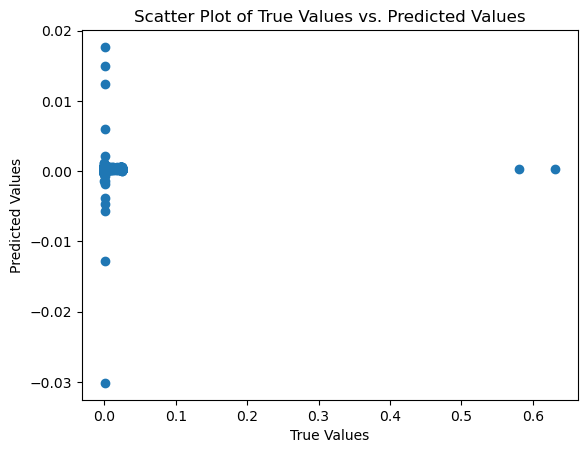

In [36]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs. Predicted Values')
plt.show()

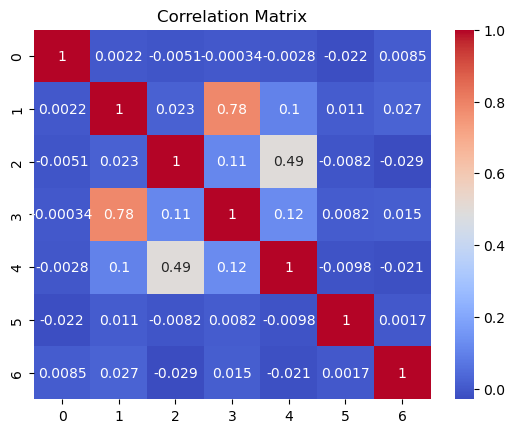

In [37]:
# SIDDHARTH UPADHYAY ; RGNO : 21BCE6103
import seaborn as sns
# Correlation matrix
corr_matrix =ds1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()